<a href="https://colab.research.google.com/github/ekkalaks/CS652_Applied-Machine-Learning/blob/main/Assignment/CS652_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS652: Assignment 3
6409035646 เอกลักษณ์ สุขมาลพงศ์กุล

github: https://github.com/ekkalaks/CS652_Applied-Machine-Learning/blob/main/CS652_Applied-Machine-Learning/Assignment/CS652_Assignment_3.ipynb

In [2]:
# Import Module ใช้กับข้อที่ 1 และ 2
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# import module ใช้กับ ข้อที่ 3
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
# import module ใช้กับ ข้อที่ 4-8
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [5]:
# import module ใช้กับ ข้อที่ 4-8
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [6]:
# import module ใช้กับ ข้อที่ 4-8
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.preprocessing import StandardScaler

## ข้อ 1 
โหลด datasetชือ credit-g จาก openml โดยใช้คําสัง fetch_openml(‘credit-g’) ทีอยู่ใน
sklearn.datasets พร้อมแสดงตัวอย่างข้อมูล สามารถเข้าไปดูคําอธิบายข้อมูลได้จาก 
https://www.openml.org/d/31 

In [8]:
# โหลด 'credit-g' เข้าตัวแปร credit_data
credit_data = fetch_openml('credit-g', version='active')

In [9]:
# แสดงรายละเอียดข้อมูล credit-g
print(credit_data.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1 (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Persona

In [10]:
# แปลง credit_data เป็น Dataframe ด้วย pandas
credit_df = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_df['class'] = credit_data.target

In [11]:
# แสดง ตัวอย่าง credit_df
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

### จะเห็นได้ว่า features/attributes ที่มีการกระจายแบบต่อเนื่องได้แก่


> duration, credit_amount,	installment_commitment,	residence_since,	age,	existing_credits,	num_dependents

In [13]:
credit_df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## ข้อ 2
 Visualize การกระจายตัวของข้อมูลทีเป็นตัวเลขต่อเนือง (continuous features)และการกระจายตัวของข้อมูลทีเป็น target

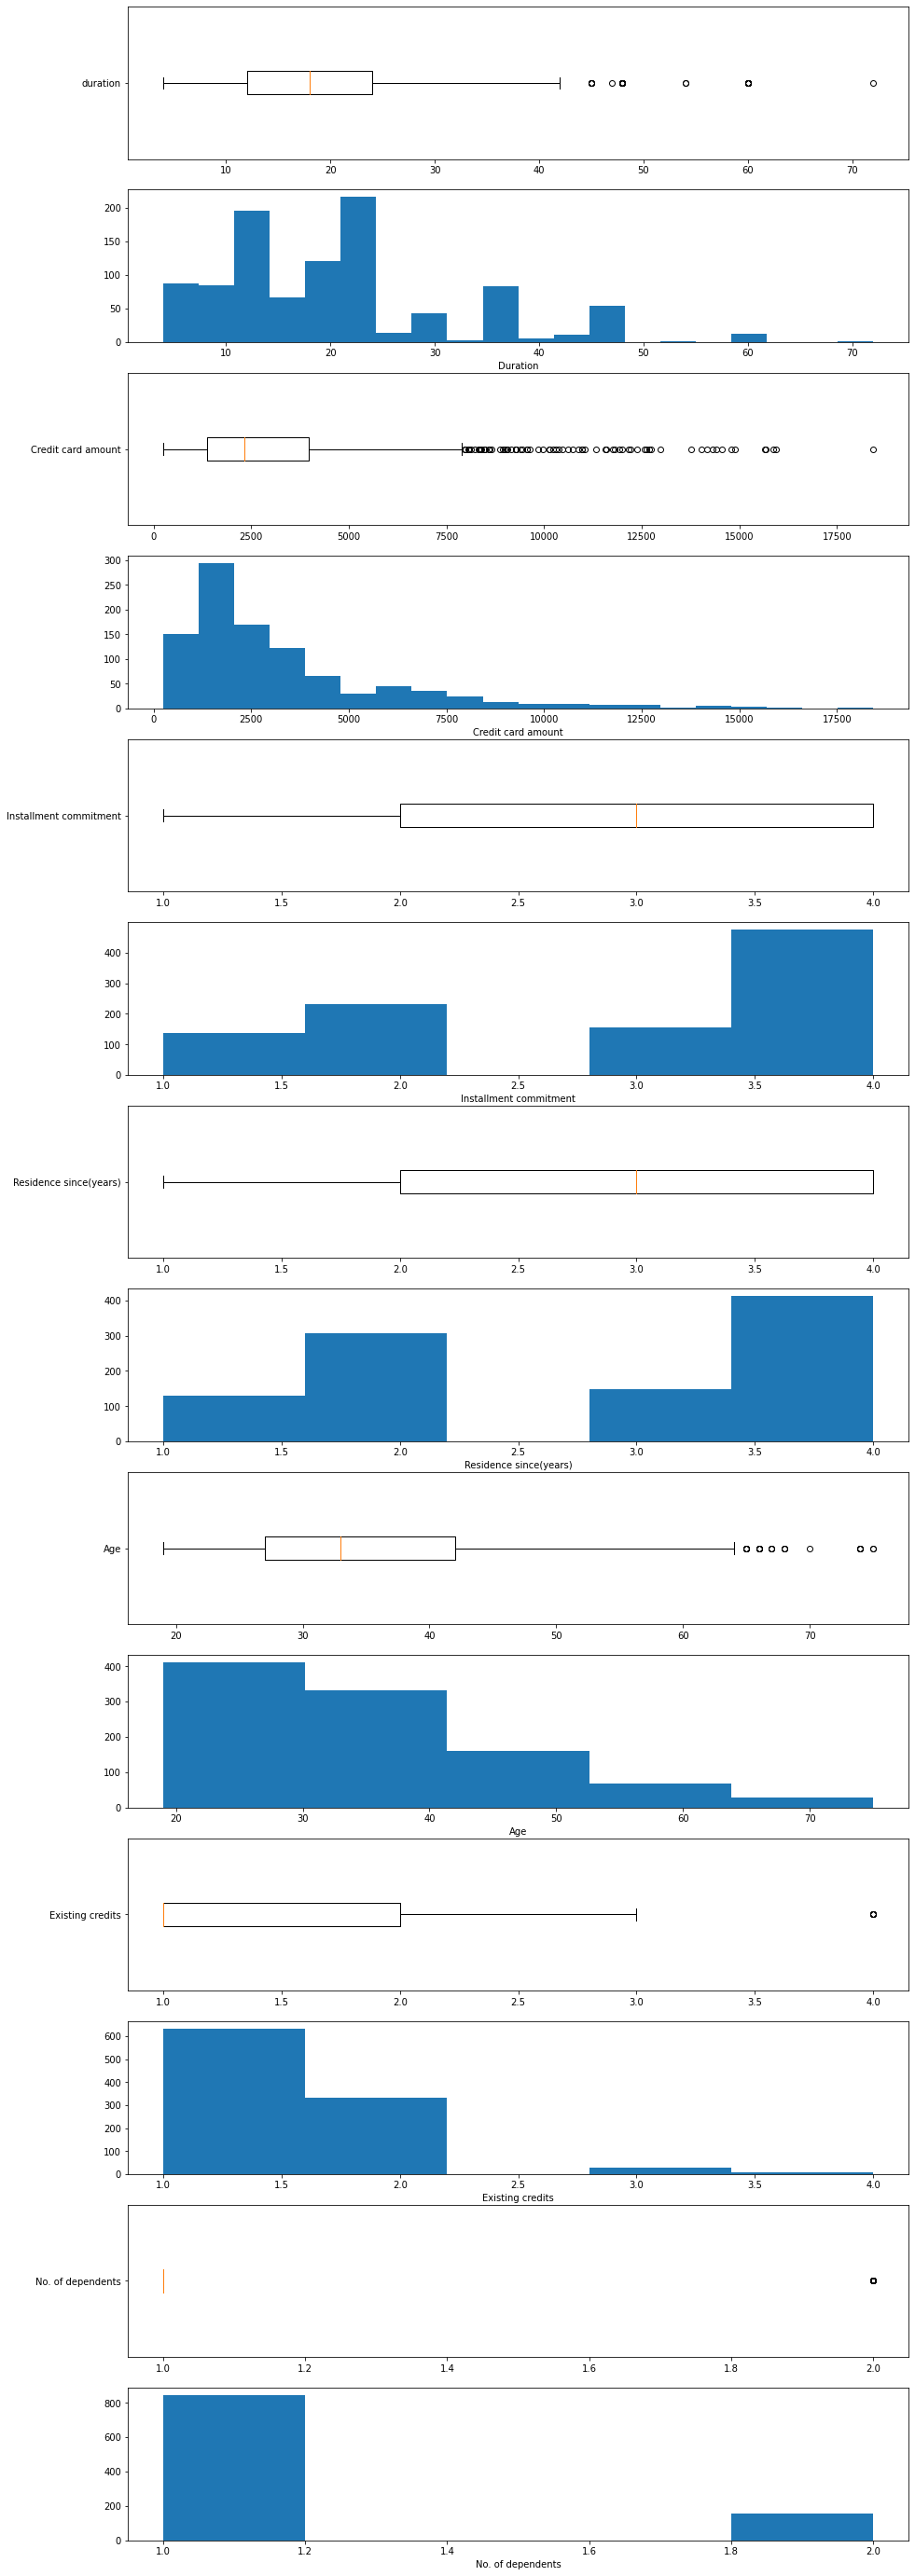

In [14]:
#plot การกระจายตัวของข้อมูลทีเป็นตัวเลขต่อเนือง (continuous features)
plt.figure(figsize=(15, 50))

# plotting boxplot and histogram for duration
ax1 = plt.subplot(14, 1, 1)
ax1.boxplot(credit_df['duration'], vert=False)
ax1.set_yticklabels(['duration'])

ax2 = plt.subplot(14,1,2)
ax2.hist(credit_df['duration'], bins=20)
ax2.set_xlabel('Duration')

# plotting box plot and histogram for credit card amount
ax3 = plt.subplot(14, 1, 3)
ax3.boxplot(credit_df['credit_amount'], vert=False)
ax3.set_yticklabels(['Credit card amount'])

ax4 = plt.subplot(14, 1, 4)
ax4.hist(credit_df['credit_amount'], bins=20)
ax4.set_xlabel('Credit card amount')

# plotting box plot and histogram for installment_commitment
ax5 = plt.subplot(14, 1, 5)
ax5.boxplot(credit_df['installment_commitment'], vert=False)
ax5.set_yticklabels(['Installment commitment'])

ax6 = plt.subplot(14,1,6)
ax6.hist(credit_df['installment_commitment'], bins=5)
ax6.set_xlabel('Installment commitment')

# plotting box plot and histogram for residence_since
ax7 = plt.subplot(14, 1, 7)
ax7.boxplot(credit_df['residence_since'], vert=False)
ax7.set_yticklabels(['Residence since(years)'])

ax8 = plt.subplot(14, 1, 8)
ax8.hist(credit_df['residence_since'], bins=5)
ax8.set_xlabel('Residence since(years)')

# plotting box plot and histogram for age
ax9 = plt.subplot(14, 1, 9)
ax9.boxplot(credit_df['age'], vert=False)
ax9.set_yticklabels(['Age'])

ax10 = plt.subplot(14, 1, 10)
ax10.hist(credit_df['age'], bins=5)
ax10.set_xlabel('Age')

# plotting box plot and histogram for existing credits
ax11 = plt.subplot(14, 1, 11)
ax11.boxplot(credit_df['existing_credits'], vert=False)
ax11.set_yticklabels(['Existing credits'])

ax12 = plt.subplot(14, 1, 12)
ax12.hist(credit_df['existing_credits'], bins=5)
ax12.set_xlabel('Existing credits')

# plotting box plot and histogram for num_dependents
ax13 = plt.subplot(14, 1, 13)
ax13.boxplot(credit_df['num_dependents'], vert=False)
ax13.set_yticklabels(['No. of dependents'])

ax14 = plt.subplot(14, 1, 14)
ax14.hist(credit_df['num_dependents'], bins=5)
ax14.set_xlabel('No. of dependents')

plt.show()

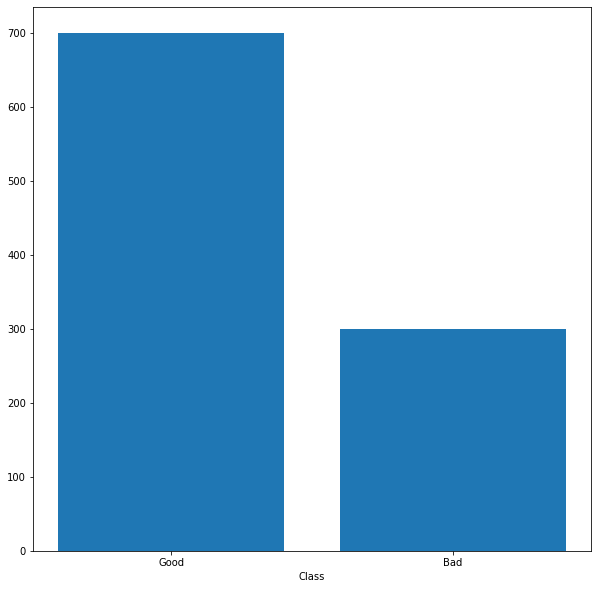

In [15]:
# การกระจายตัวของข้อมูลทีเป็น target
class_ = credit_df['class']
num_good = class_[class_ == 'good']
num_bad = class_[class_ == 'bad']
labels = ['Good', 'Bad']
y_pos = np.arange(2)
x_values = [len(num_good), len(num_bad)]
plt.figure(figsize=(10, 10))
plt.bar(y_pos, x_values)
plt.xticks(np.arange(2), ('Good', 'Bad'))
plt.xlabel('Class')

plt.show()

## ข้อ 3
แปลงข้อมูล categorical variables ให้เป็นตัวเลขโดยให้เลือกใช้ OneHotEncoder จาก
category_encoder package.

### categorical variables ได้แก่
checking_status, credit_history, purpose, savings_status,
employment, personal_status, other_parties, property_magnitude, 
other_payment_plans, housing, job, own_telephone, foreign_worker


In [16]:
credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y=True)
categorical_features = ['checking_status', 'credit_history', 'employment', 
                        'foreign_worker', 'housing', 'job', 'other_parties', 
                        'other_payment_plans', 'own_telephone', 'personal_status',
                        'property_magnitude', 'purpose', 'savings_status']

numeric_features = [feature for feature in credit_data.feature_names if feature not in categorical_features]

enc = OneHotEncoder(handle_unknown='ignore')

In [17]:
enc_df = pd.DataFrame(enc.fit_transform(credit_dataX[categorical_features]).toarray())

In [18]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## ข้อ 4
แบ่งข้อมูลทีแปลงได้ออกเป็น training และtesting set (อย่าเพิงใช้ข้อมูลจาก test set เก็บไว้ใช้ในข้อ7)

In [19]:
# Perorming Label encoding on the target
le = LabelEncoder()
y = le.fit_transform(credit_datay)

In [20]:
# creating the training test split
X_train, X_test, y_train, y_test = train_test_split(credit_dataX, y, random_state=45)

In [21]:
# การตรวจสอบแบบไขว้ k-fold เพื่อสลับเวียนข้อมูลที่ใช้ในการฝึกฝนและตรวจสอบ
skf = StratifiedKFold(n_splits=5, shuffle=True)

## ข้อ 5
สร้างโมเดลด้วย Logistic Regression, Linear support vector machines และk-nearest neighbors 
และประเมินผลด้วย training dataโดยเปรียบเทียบผลลัพธ์ทีได้ของทั้งสามโมเดล

In [22]:
# Logistic Regression Model
preprocess_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(preprocess_lr, LogisticRegression()).fit(X_train, y_train)
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=skf, scoring='accuracy')
print('Credit-g dataset with Logistic Regression Model')
print('Accuracy of Logistic regression classifier on training set: {:.3f}'
     .format(np.mean(scores_lr)))

Credit-g dataset with Logistic Regression Model
Accuracy of Logistic regression classifier on training set: 0.724


In [23]:
preprocess_svc = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_svc = make_pipeline(preprocess_svc, LinearSVC()).fit(X_train, y_train)
scores_svc = cross_val_score(model_svc, X_train, y_train, cv=skf, scoring='accuracy')
print('Credit-g dataset with Linear support vector machines')
print('Accuracy of LinearSVC on training set: {:.3f}'
     .format(np.mean(scores_svc)))

Credit-g dataset with Linear support vector machines
Accuracy of LinearSVC on training set: 0.737


In [24]:
preprocess_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(preprocess_knn, KNeighborsClassifier()).fit(X_train, y_train)
scores_knn = cross_val_score(model_knn, X_train, y_train, cv=skf, scoring='accuracy')
print('Credit-g dataset with k-nearest neighbors')
print('Accuracy of k-nearest neighbors on training set: {:.3f}'
     .format(np.mean(scores_knn)))

Credit-g dataset with k-nearest neighbors
Accuracy of k-nearest neighbors on training set: 0.711


## ข้อ 6
แปลง scale ข้อมูลที่เป็น continuous features ด้วย StandardScaler และเปรียบเทียบผลลัพธ์ที่ได้ของ
ทั้งสามโมเดล

In [25]:
scaler = StandardScaler()

In [26]:
# Logistic Regression Model with scaled data
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression(max_iter=5000)).fit(X_train, y_train)
scores_lrs = cross_val_score(model_lrs, X_train, y_train, cv=skf, scoring='accuracy')
# scores_lrs_test = cross_val_score(model_lrs, X_test, y_test, cv=skf, scoring='accuracy')
print('Credit-g dataset with Logistic Regression and data scaled Model')
print('Accuracy of Logistic regression classifier on training set: {:.3f}'
     .format(np.mean(scores_lrs)))
# print('Accuracy of Logistic regression classifier on test set: {:.3f}'
#      .format(np.mean(scores_lrs_test)))

Credit-g dataset with Logistic Regression and data scaled Model
Accuracy of Logistic regression classifier on training set: 0.745


In [27]:
# Linear support vector machines and data scaled Model
preprocess_svc = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svc, LinearSVC(max_iter=5000)).fit(X_train, y_train)
scores_svcs = cross_val_score(model_svcs, X_train, y_train, cv=skf, scoring='accuracy')
print('Credit-g dataset with Linear support vector machines and data scaled Model')
print('Accuracy of Linear support vector machines on training set: {:.3f}'
     .format(np.mean(scores_svcs)))

Credit-g dataset with Linear support vector machines and data scaled Model
Accuracy of Linear support vector machines on training set: 0.745


In [28]:
# k-nearest neighbors Model with scaled data
preprocess_knn = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knn, KNeighborsClassifier()).fit(X_train, y_train)
scores_knns = cross_val_score(model_knns, X_train, y_train, cv=skf, scoring='accuracy')
print('Credit-g dataset with k-nearest neighbors and data scaled Model')
print('Accuracy of k-nearest neighbors on training set: {:.3f}'
     .format(np.mean(scores_knns)))

Credit-g dataset with k-nearest neighbors and data scaled Model
Accuracy of k-nearest neighbors on training set: 0.725


สรุป ข้อ 6 

จากผลลัพธ์ แสดงได้ว่า ค่า accuracy นั้นดีขึ้น เมื่อเราใช้ การ scaling สำหรับ Numeric Features(duration, credit_amount,	installment_commitment,	residence_since,	age,	existing_credits,	num_dependents)

    โดย เมื่อดูจาก Logistic Regression นั้น ค่า accuracy ดีขึ้น จาก 0.724 เป็น 0.745

    และ เมื่อดูจาก Linear support vector machine แล้วนั้น ค่า accuracy ดีขึ้นจาก 0.737 เป็น 0.745

## ข้อ 7
ให้ลองปรับค่า parameters ด้วยการใช้GridSearchCV แล้วดูว่าผลลัพธ์ดีขึ้นหรือไม่ ให้ประเมินผลด้วย
ข้อมูล test set แสดงประสิทธิภาพของฟังก์ชันด้วยการกราฟเปรียบเทียบของทั้งสามโมเดล

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Grid Search คืออะไร
Grid Search เป็นวิธีที่ง่ายในการหาค่าที่ดีที่สุดของพารามิเตอร์ วิธีคือการกำหนดค่าของแต่ละพารามิเตอร์ที่เราต้องการจะหา แล้วลองรันโมเดลของเรา และเราจะต้องทำแบบนี้จนกว่าจะหมดพารามิเตอร์ที่เราต้องการหา โดยเราต้องเปลี่ยนค่าพารามิเตอร์ไปเรื่อยๆ ข้อเสียของการใช้ Grid Search คือ เราจะใช้ได้กับโมเดลที่เล็ก ถ้าเป็นโมเดลใหญ่จะใช้เวลาในการรันนานมาก

In [29]:
# Logistic Regression Model

# Preprocess data
preprocess_data = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))

# Create Pipeline for Logistic Regression Model
lrs_pipe = make_pipeline(preprocess_data, LogisticRegression(max_iter=5000))

# Assign parameter for grid search
param_grid_lrs = {"logisticregression__C" : np.logspace(-2, 20, 20)}

# Fit Model
grid_lrs = GridSearchCV(lrs_pipe, param_grid_lrs, cv=skf, return_train_score=True).fit(X_train, y_train)


In [30]:
print("best mean cross-validation score: {:.3f}".format(grid_lrs.best_score_))
print("best parameters: {}".format(grid_lrs.best_params_))

best mean cross-validation score: 0.749
best parameters: {'logisticregression__C': 2.06913808111479}


In [50]:
# Logistic Regression Model with C = 2.06913808111479

model_lrs_new_c = make_pipeline(preprocess_data, LogisticRegression(C=2.06913808111479, max_iter=5000)).fit(X_train, y_train)
scores_lrs = cross_val_score(model_lrs_new_c, X_test, y_test, cv=skf, scoring='accuracy')

print('Accuracy of Logistic regression classifier with C=2.06913808111479 on test set: {:.3f}'
     .format(np.mean(scores_lrs)))

Accuracy of Logistic regression classifier with C=2.06913808111479 on test set: 0.740


In [32]:
# Linear support vector machines

# Create Pipeline for Linear support vector machines
svc_pipe = make_pipeline(preprocess_data, LinearSVC(max_iter=5000))

# Assign parameter for grid search
# param_grid = {"linearsvc__C" : np.linspace(1, 100)}
param_grid_svc = {'linearsvc__C': np.logspace(-5, 10, 20)}

# Fit LinearSVC Model
grid_svc = GridSearchCV(svc_pipe, param_grid_svc, cv=skf, return_train_score=True).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [33]:
# print best parameter for LinearSVC Model
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))


best mean cross-validation score: 0.756
best parameters: {'linearsvc__C': 0.01438449888287663}


In [55]:
# LinearSVC Model with C = 0.08858667904100832

model_svc_new_c = make_pipeline(preprocess_data, LinearSVC(C=0.01438449888287663, max_iter=5000)).fit(X_train, y_train)

scores_svcs_grid = cross_val_score(model_svcs, X_test, y_test, cv=skf, scoring='accuracy')

print('Accuracy of Logistic regression classifier with C=0.01438449888287663 on test set: {:.3f}'
     .format(np.mean(scores_svcs_grid)))

Accuracy of Logistic regression classifier with C=0.01438449888287663 on test set: 0.752


In [35]:
# k-nearest neighbors Model

# Create Pipeline for Linear support vector machines
knn_pipe = make_pipeline(preprocess_data, KNeighborsClassifier())

# Assign parameter for grid search
param_grid_knn = {'kneighborsclassifier__n_neighbors': range(1,10)}

# Fit LinearSVC Model
grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=skf, return_train_score=True).fit(X_train, y_train)

In [36]:
# print best parameter for k-nearest neighbors Model
print("best parameters: {}".format(grid_knn.best_params_))


best parameters: {'kneighborsclassifier__n_neighbors': 9}


In [60]:
# k-nearest neighbors Model with n_neighbors=9

model_knn_new_c = make_pipeline(preprocess_data, KNeighborsClassifier(n_neighbors=9)).fit(X_train, y_train)

scores_knns_grid = cross_val_score(model_knns, X_test, y_test, cv=skf, scoring='accuracy')

print('Accuracy of Logistic regression classifier with C=9 on test set: {:.3f}'.format(np.mean(scores_knns_grid)))

Accuracy of Logistic regression classifier with C=9 on test set: 0.668


สรุป ข้อ 6



> ค่า accuracy ก่อน GridSearchCV ของ train_set ของทั้งสามโมเดลเป็นดังนี้


    lr = 0.745

    svc  0.745

    knn = 0.725

> ค่า accuracy หลัง GridSearchCV ของ train_set ของทั้งสามโมเดลเป็นดังนี้



    lr = 0.740

    svc  0.752

    knn = 0.668
















Visualizing performance

For logistic regression

In [38]:
grid_lrs.cv_results_

{'mean_fit_time': array([0.03445401, 0.04449925, 0.06109586, 0.08526058, 0.06276898,
        0.06514349, 0.06191921, 0.06706119, 0.07299604, 0.06402383,
        0.0747961 , 0.06857615, 0.07573295, 0.06534328, 0.07330737,
        0.07022147, 0.06832442, 0.06786141, 0.06981206, 0.06580162]),
 'mean_score_time': array([0.01274438, 0.01204777, 0.01157351, 0.01219316, 0.0109911 ,
        0.01203179, 0.01091151, 0.01139541, 0.01117105, 0.01097698,
        0.01139812, 0.01185083, 0.01504989, 0.01109281, 0.01123815,
        0.01252093, 0.01276727, 0.01140814, 0.01100736, 0.01094069]),
 'mean_test_score': array([0.72133333, 0.74266667, 0.74933333, 0.74533333, 0.74133333,
        0.74133333, 0.74133333, 0.74133333, 0.74133333, 0.74133333,
        0.74133333, 0.74133333, 0.74133333, 0.74133333, 0.74133333,
        0.74133333, 0.74133333, 0.74133333, 0.74133333, 0.74133333]),
 'mean_train_score': array([0.73333333, 0.78666667, 0.79666667, 0.794     , 0.79366667,
        0.794     , 0.794     , 0.7

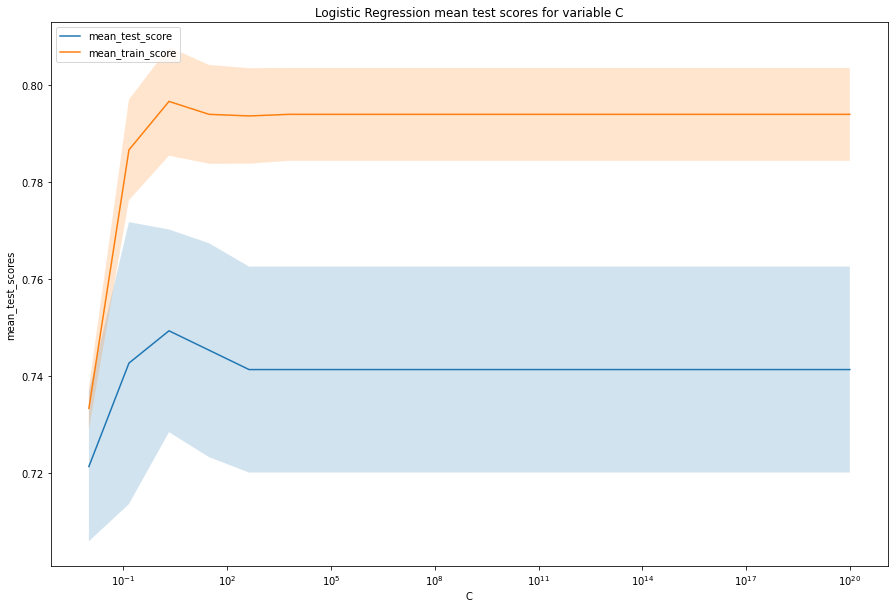

In [39]:
lr_cvalues = np.logspace(-2, 20, 20)
lr_mean_test_scores = np.asarray(grid_lrs.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lrs.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lrs.cv_results_['std_test_score'])
std_train = np.asarray(grid_lrs.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_cvalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_cvalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_cvalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_cvalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='Logistic Regression mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

For SVC

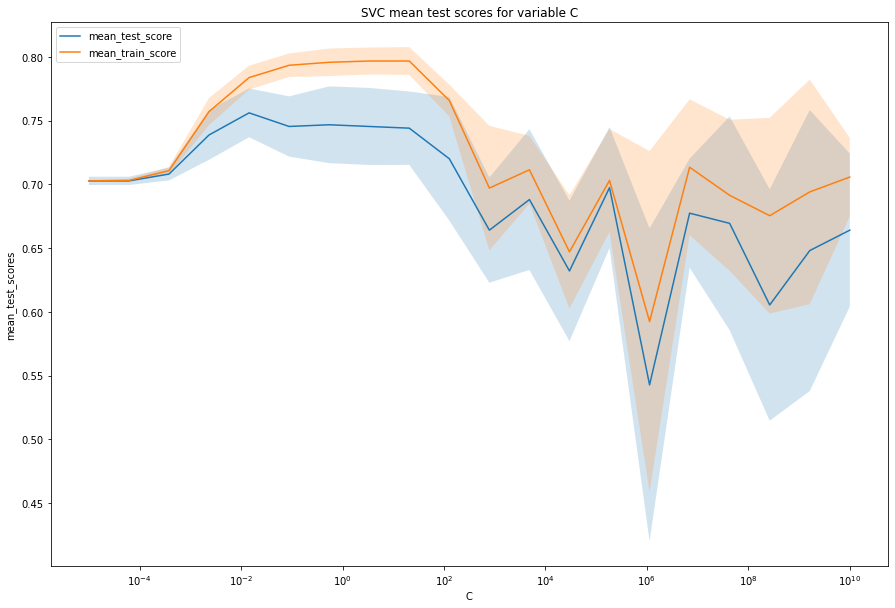

In [40]:
svc_c_values = np.logspace(-5, 10, 20)
svc_mean_test_scores = np.asarray(grid_svc .cv_results_['mean_test_score'])
svc_mean_train_scores = np.asarray(grid_svc .cv_results_['mean_train_score'])
std_test = np.asarray(grid_svc .cv_results_['std_test_score'])
std_train = np.asarray(grid_svc .cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(svc_c_values, svc_mean_test_scores, label='mean_test_score')
ax.plot(svc_c_values, svc_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(svc_c_values, svc_mean_test_scores + std_test, svc_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(svc_c_values, svc_mean_train_scores+std_train, svc_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

For KNearestNeighbors

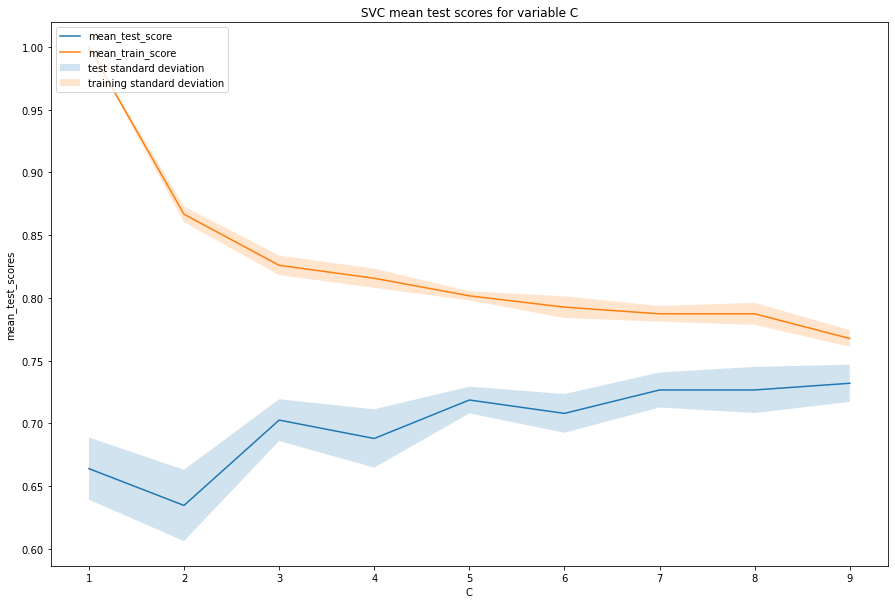

In [41]:
knn_c_values = range(1, 10)
knn_mean_test_scores = np.asarray(grid_knn.cv_results_['mean_test_score'])
knn_mean_train_scores = np.asarray(grid_knn.cv_results_['mean_train_score'])
std_test = np.asarray(grid_knn.cv_results_['std_test_score'])
std_train = np.asarray(grid_knn.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(knn_c_values, knn_mean_test_scores, label='mean_test_score')
ax.plot(knn_c_values, knn_mean_train_scores, label='mean_train_score')
# ax.set_xscale("log")
ax.fill_between(knn_c_values, knn_mean_test_scores + std_test, knn_mean_test_scores - std_test, alpha=0.2, label='test standard deviation')
ax.fill_between(knn_c_values, knn_mean_train_scores+std_train, knn_mean_train_scores-std_train, alpha=0.2, label='training standard deviation')

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

## ข้อ 8

ให้แสดงรูปของค่าcoefficients20 ตัวที่สําคัญที่สุดของ LogisticRegression และ Linear Support 
Vector Machines ที่ใช้ค่า hyper-parameters ที่ดีทีสุดที่ได้จากการทํา grid search

Plotting performance of best 20 coefficients for Logistic Regression

In [42]:
categorical_fe = credit_dataX[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = numeric_features + encoded_categories

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
plr = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
mlr = make_pipeline(plr, LogisticRegression(C=2.06913808111479))
mlr.fit(X_train, y_train)
coefficients = mlr.steps[1][1].coef_

In [52]:
# convert the above array into an array of tuples
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

In [53]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

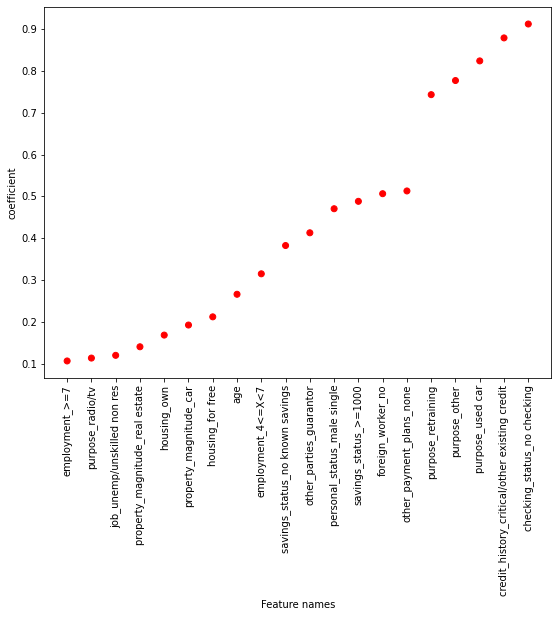

In [54]:
coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

Plotting the best 20 coefficients for Linear SVC

In [56]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.01438449888287663))
model_svcs.fit(X_train, y_train)
scores_svcs = cross_val_score(model_svcs, X_train, y_train, scoring='accuracy')
coefficients = model_svcs.steps[1][1].coef_

In [57]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

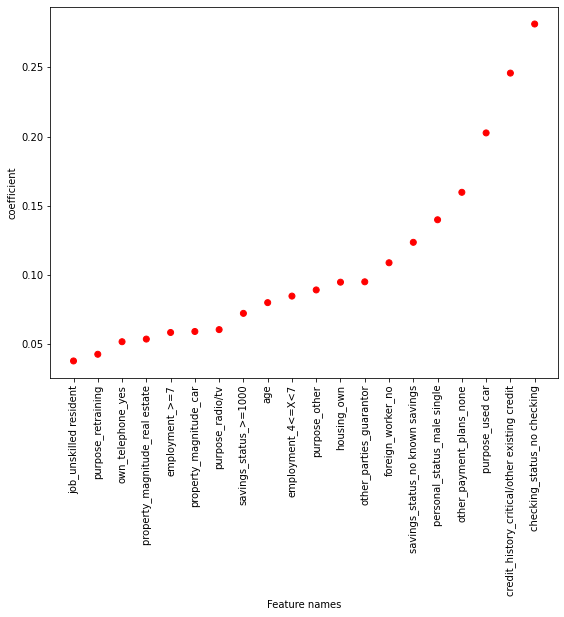

In [58]:
plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()